In [73]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
#pio.renderers.default='notebook'
#%matplotlib inline
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go

In [78]:
benef = pd.read_csv('./benef_new_label.csv')

In [138]:
benef['Age'] = benef['Age']//365
benef['Fraud Indicator'] = np.where((benef['NumOfNonFraud']>0) & (benef['NumOfPotentialFraud']==0)
                                & (benef['NumOfRealFraud']==0), 1, 0)
#benef.info()
benef

,BID,Gender,Is_inpatient,Age,Race,State,County,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,...,RenalDisease,FullYearPlanA,FullYearPlanB,ChronicDisease_Num,NumOfClaims,NumOfNonFraud,NumOfPotentialFraud,NumOfRealFraud,HasNonFraud,Fraud Indicator
0,BENE100000,1,0,0,1,49,430,1,1,1,...,0,True,True,10,2,0,2,0,0,0
1,BENE100001,1,0,0,1,33,420,0,1,1,...,0,True,True,7,10,5,5,0,0,0
2,BENE100002,2,0,0,2,33,20,0,0,1,...,0,True,True,4,14,10,3,1,0,0
3,BENE100003,2,0,0,3,22,90,1,1,1,...,0,True,True,10,1,0,0,1,0,0
4,BENE100004,2,0,0,1,15,210,1,0,0,...,1,True,True,5,6,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE99994,2,0,0,2,45,570,0,1,1,...,0,True,True,8,7,5,2,0,0,0
138552,BENE99995,2,1,0,1,39,470,0,0,1,...,0,True,True,3,2,1,1,0,0,0
138553,BENE99997,2,0,0,1,22,60,1,0,0,...,0,True,True,5,7,5,2,0,0,0
138554,BENE99998,1,0,0,1,45,910,1,1,1,...,0,True,True,9,3,0,3,0,0,0


In [139]:
sub_diseaseNum = benef[['ChronicDisease_Num', 'NumOfNonFraud','NumOfPotentialFraud','NumOfRealFraud']]

In [81]:
sub1 = sub_diseaseNum.groupby(['ChronicDisease_Num']).sum().reset_index()
sub1

,ChronicDisease_Num,NumOfNonFraud,NumOfPotentialFraud,NumOfRealFraud
0,0,242,190,30
1,1,2469,1404,317
2,2,10314,5654,1254
3,3,23304,12207,2376
4,4,36915,19620,3640
5,5,47002,25177,4337
6,6,50823,27504,4371
7,7,51662,27711,4088
8,8,45190,23885,3287
9,9,37635,19851,2529


In [82]:
sub1['non_fraud_perentage']= sub1['NumOfNonFraud']/(sub1['NumOfPotentialFraud']+sub1['NumOfNonFraud']+sub1['NumOfRealFraud'])
sub1['potential_fraud_percentage']= sub1['NumOfPotentialFraud']/(sub1['NumOfPotentialFraud']+sub1['NumOfNonFraud']+sub1['NumOfRealFraud'])
sub1['real_fraud_percentage']= sub1['NumOfRealFraud']/(sub1['NumOfPotentialFraud']+sub1['NumOfNonFraud']+sub1['NumOfRealFraud'])
sub1

,ChronicDisease_Num,NumOfNonFraud,NumOfPotentialFraud,NumOfRealFraud,non_fraud_perentage,potential_fraud_percentage,real_fraud_percentage
0,0,242,190,30,0.523810,0.411255,0.064935
1,1,2469,1404,317,0.589260,0.335084,0.075656
2,2,10314,5654,1254,0.598885,0.328301,0.072814
3,3,23304,12207,2376,0.615092,0.322195,0.062713
4,4,36915,19620,3640,0.613461,0.326049,0.060490
5,5,47002,25177,4337,0.614277,0.329042,0.056681
6,6,50823,27504,4371,0.614561,0.332584,0.052855
7,7,51662,27711,4088,0.618996,0.332023,0.048981
8,8,45190,23885,3287,0.624499,0.330077,0.045424
9,9,37635,19851,2529,0.627093,0.330767,0.042139


<AxesSubplot:title={'center':'fraud percentage w.r.t.number of chronic disease'}, xlabel='ChronicDisease_Num'>

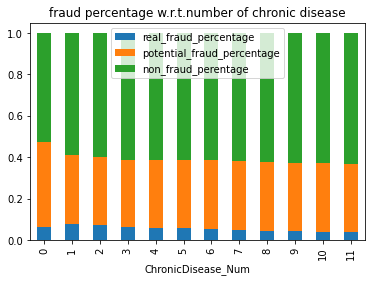

In [107]:
sub1[['ChronicDisease_Num', 'real_fraud_percentage','potential_fraud_percentage', 'non_fraud_perentage']].plot(kind='bar', title="fraud percentage w.r.t.number of chronic disease", 
                                        x= 'ChronicDisease_Num',stacked=True)


# Use Fraud Indicator

In [145]:
sub0 = benef[['ChronicDisease_Num', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['ChronicDisease_Num',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub0

,ChronicDisease_Num,Fraud Indicator,count
0,0,0,60
1,0,1,11
2,1,0,452
3,1,1,132
4,2,0,1903
5,2,1,574
6,3,0,4366
7,3,1,1526
8,4,0,7290
9,4,1,2945


In [146]:
sub0 = sub0.pivot(index='ChronicDisease_Num', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub0

Fraud Indicator,ChronicDisease_Num,never fraud,has ever (potentially) fraud
0,0,60,11
1,1,452,132
2,2,1903,574
3,3,4366,1526
4,4,7290,2945
5,5,9832,4531
6,6,11507,5993
7,7,12564,7582
8,8,11852,8483
9,9,10672,8768


In [147]:
sub0['never fraud percentage']= sub0['never fraud']/(sub0['never fraud']+sub0['has ever (potentially) fraud'])
sub0['has ever (potentially) fraud percentage'
    ]= sub0['has ever (potentially) fraud']/(sub0['never fraud']+sub0['has ever (potentially) fraud'])
sub0

Fraud Indicator,ChronicDisease_Num,never fraud,has ever (potentially) fraud,never fraud percentage,has ever (potentially) fraud percentage
0,0,60,11,0.845070,0.154930
1,1,452,132,0.773973,0.226027
2,2,1903,574,0.768268,0.231732
3,3,4366,1526,0.741005,0.258995
4,4,7290,2945,0.712262,0.287738
5,5,9832,4531,0.684537,0.315463
6,6,11507,5993,0.657543,0.342457
7,7,12564,7582,0.623647,0.376353
8,8,11852,8483,0.582837,0.417163
9,9,10672,8768,0.548971,0.451029


<AxesSubplot:title={'center':'fraud percentage w.r.t.number of chronic disease'}, xlabel='ChronicDisease_Num'>

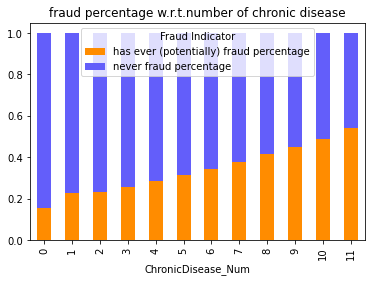

In [173]:
sub0[['ChronicDisease_Num', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t.number of chronic disease",
                 x= 'ChronicDisease_Num',stacked=True, color=['#FF8C00','#635EFA'])

In [84]:
benef

,BID,Gender,Is_inpatient,Age,Race,State,County,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,...,Chronic_rheumatoidarthritis,Chronic_stroke,RenalDisease,FullYearPlanA,FullYearPlanB,ChronicDisease_Num,NumOfClaims,NumOfNonFraud,NumOfPotentialFraud,NumOfRealFraud
0,BENE100000,1,0,70,1,49,430,1,1,1,...,1,1,0,True,True,10,2,0,2,0
1,BENE100001,1,0,70,1,33,420,0,1,1,...,1,0,0,True,True,7,10,5,5,0
2,BENE100002,2,0,71,2,33,20,0,0,1,...,1,0,0,True,True,4,14,10,3,1
3,BENE100003,2,0,59,3,22,90,1,1,1,...,1,1,0,True,True,10,1,0,0,1
4,BENE100004,2,0,66,1,15,210,1,0,0,...,1,1,1,True,True,5,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE99994,2,0,64,2,45,570,0,1,1,...,1,1,0,True,True,8,7,5,2,0
138552,BENE99995,2,1,79,1,39,470,0,0,1,...,0,0,0,True,True,3,2,1,1,0
138553,BENE99997,2,0,80,1,22,60,1,0,0,...,0,1,0,True,True,5,7,5,2,0
138554,BENE99998,1,0,79,1,45,910,1,1,1,...,1,1,0,True,True,9,3,0,3,0


In [174]:
diseases = ['Chronic_Alzheimer',
       'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
       'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
       'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
       'Chronic_rheumatoidarthritis', 'Chronic_stroke','RenalDisease', 'NumOfNonFraud',
            'NumOfPotentialFraud','NumOfRealFraud', 'Fraud Indicator']
sub_disease=benef[diseases]
sub_disease

,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,Chronic_Cancer,Chronic_ObstrPulmonary,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,RenalDisease,NumOfNonFraud,NumOfPotentialFraud,NumOfRealFraud,Fraud Indicator
0,1,1,1,1,1,1,1,0,1,1,1,0,0,2,0,0
1,0,1,1,1,1,1,1,0,0,1,0,0,5,5,0,0
2,0,0,1,1,0,0,0,0,1,1,0,0,10,3,1,0
3,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,1,1,1,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,0,1,1,1,1,0,0,1,1,1,1,0,5,2,0,0
138552,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0
138553,1,0,0,1,1,1,0,0,0,0,1,0,5,2,0,0
138554,1,1,1,1,1,1,0,0,1,1,1,0,0,3,0,0


<AxesSubplot:title={'center':'fraud percentage w.r.t.number of chronic disease'}, xlabel='if have Chronic Alzheimer'>

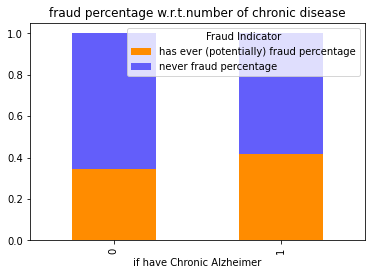

In [181]:
sub2 = benef[['Chronic_Alzheimer', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_Alzheimer',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub2 = sub2.pivot(index='Chronic_Alzheimer', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub2['never fraud percentage']= sub2['never fraud']/(sub2['never fraud']+sub2['has ever (potentially) fraud'])
sub2['has ever (potentially) fraud percentage'
    ]= sub2['has ever (potentially) fraud']/(sub2['never fraud']+sub2['has ever (potentially) fraud'])
g2 = sub2[['Chronic_Alzheimer', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t.Chronic Alzheimer",
                 x= 'Chronic_Alzheimer',stacked=True, color=['#FF8C00','#635EFA'])
g2.set(xlabel='if have Chronic Alzheimer')
g2

In [183]:
# sub2['non_fraud_perentage']= sub2['NumOfNonFraud']/(sub2['NumOfPotentialFraud']+sub2['NumOfNonFraud']+sub2['NumOfRealFraud'])
# sub2['potential_fraud_percentage']= sub2['NumOfPotentialFraud']/(sub2['NumOfPotentialFraud']+sub2['NumOfNonFraud']+sub2['NumOfRealFraud'])
# sub2['real_fraud_percentage']= sub2['NumOfRealFraud']/(sub2['NumOfPotentialFraud']+sub2['NumOfNonFraud']+sub2['NumOfRealFraud'])
# sub2

In [182]:
# g2 = sub2[['Chronic_Alzheimer', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t.chronic Alzheimer", 
#                                         x= 'Chronic_Alzheimer',stacked=True)
# g2.set(xlabel='if have Chronic Alzheimer')



<AxesSubplot:title={'center':'fraud percentage w.r.t.Chronic Heartfailure'}, xlabel='if have Chronic Heartfailure'>

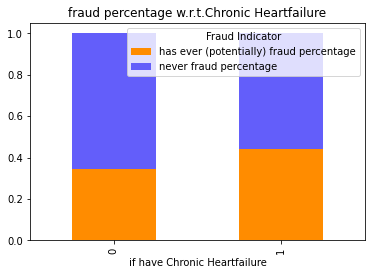

In [188]:
# sub3 = sub_disease.groupby(['Chronic_Heartfailure']).sum().reset_index()

sub3 = benef[['Chronic_Heartfailure', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_Heartfailure',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub3 = sub3.pivot(index='Chronic_Heartfailure', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub3['never fraud percentage']= sub3['never fraud']/(sub3['never fraud']+sub3['has ever (potentially) fraud'])
sub3['has ever (potentially) fraud percentage'
    ]= sub3['has ever (potentially) fraud']/(sub3['never fraud']+sub3['has ever (potentially) fraud'])
g3 = sub3[['Chronic_Heartfailure', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t.Chronic Heartfailure",
                 x= 'Chronic_Heartfailure',stacked=True, color=['#FF8C00','#635EFA'])
g3.set(xlabel='if have Chronic Heartfailure')
g3


In [185]:
# sub3['non_fraud_perentage']= sub3['NumOfNonFraud']/(sub3['NumOfPotentialFraud']+sub3['NumOfNonFraud']+sub3['NumOfRealFraud'])
# sub3['potential_fraud_percentage']= sub3['NumOfPotentialFraud']/(sub3['NumOfPotentialFraud']+sub3['NumOfNonFraud']+sub3['NumOfRealFraud'])
# sub3['real_fraud_percentage']= sub3['NumOfRealFraud']/(sub3['NumOfPotentialFraud']+sub3['NumOfNonFraud']+sub3['NumOfRealFraud'])
# sub3

In [186]:
# g3 = sub3[['Chronic_Heartfailure', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. chronic heartfailure", 
#                                         x= 'Chronic_Heartfailure',stacked=True)
# g3.set(xlabel='if have Chronic heartfailure')




<AxesSubplot:title={'center':'fraud percentage w.r.t.Chronic Kidney Disease'}, xlabel='if have Chronic Kidney Disease'>

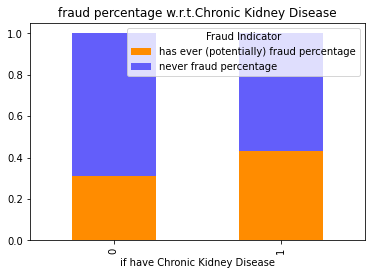

In [189]:
#sub4 = sub_disease.groupby(['Chronic_KidneyDisease']).sum().reset_index()
sub4 = benef[['Chronic_KidneyDisease', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_KidneyDisease',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub4 = sub4.pivot(index='Chronic_KidneyDisease', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub4['never fraud percentage']= sub4['never fraud']/(sub4['never fraud']+sub4['has ever (potentially) fraud'])
sub4['has ever (potentially) fraud percentage'
    ]= sub4['has ever (potentially) fraud']/(sub4['never fraud']+sub4['has ever (potentially) fraud'])
g4 = sub4[['Chronic_KidneyDisease', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t.Chronic Kidney Disease",
                 x= 'Chronic_KidneyDisease',stacked=True, color=['#FF8C00','#635EFA'])
g4.set(xlabel='if have Chronic Kidney Disease')
g4



In [190]:
# sub4['non_fraud_perentage']= sub4['NumOfNonFraud']/(sub4['NumOfPotentialFraud']+sub4['NumOfNonFraud']+sub4['NumOfRealFraud'])
# sub4['potential_fraud_percentage']= sub4['NumOfPotentialFraud']/(sub4['NumOfPotentialFraud']+sub4['NumOfNonFraud']+sub4['NumOfRealFraud'])
# sub4['real_fraud_percentage']= sub4['NumOfRealFraud']/(sub4['NumOfPotentialFraud']+sub4['NumOfNonFraud']+sub4['NumOfRealFraud'])
# sub4

In [191]:
# g4 = sub4[['Chronic_KidneyDisease', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. chronic Kidney Disease", 
#                                         x= 'Chronic_KidneyDisease',stacked=True)
# g4.set(xlabel='if have Chronic Kidney Disease')


In [194]:
# sub5 = sub_disease.groupby(['Chronic_Cancer']).sum().reset_index()
# sub5
# sub5['non_fraud_perentage']= sub5['NumOfNonFraud']/(sub5['NumOfPotentialFraud']+sub5['NumOfNonFraud']+sub5['NumOfRealFraud'])
# sub5['potential_fraud_percentage']= sub5['NumOfPotentialFraud']/(sub5['NumOfPotentialFraud']+sub5['NumOfNonFraud']+sub5['NumOfRealFraud'])
# sub5['real_fraud_percentage']= sub5['NumOfRealFraud']/(sub5['NumOfPotentialFraud']+sub5['NumOfNonFraud']+sub5['NumOfRealFraud'])
# g5 = sub5[['Chronic_Cancer', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. cancer", 
#                                         x= 'Chronic_Cancer',stacked=True)
# g5.set(xlabel='if have cancer')

<AxesSubplot:title={'center':'fraud percentage w.r.t.Chronic Cancer'}, xlabel='if have Chronic Cancer'>

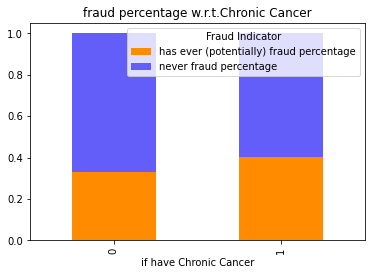

In [193]:
sub5 = benef[['Chronic_Cancer', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_Cancer',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub5 = sub5.pivot(index='Chronic_Cancer', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub5['never fraud percentage']= sub5['never fraud']/(sub5['never fraud']+sub5['has ever (potentially) fraud'])
sub5['has ever (potentially) fraud percentage'
    ]= sub5['has ever (potentially) fraud']/(sub5['never fraud']+sub5['has ever (potentially) fraud'])
g5 = sub5[['Chronic_Cancer', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t.Chronic Cancer",
                 x= 'Chronic_Cancer',stacked=True, color=['#FF8C00','#635EFA'])
g5.set(xlabel='if have Chronic Cancer')
g5



In [195]:
# sub6 = sub_disease.groupby(['Chronic_ObstrPulmonary']).sum().reset_index()
# sub6
# sub6['non_fraud_perentage']= sub6['NumOfNonFraud']/(sub6['NumOfPotentialFraud']+sub6['NumOfNonFraud']+sub6['NumOfRealFraud'])
# sub6['potential_fraud_percentage']= sub6['NumOfPotentialFraud']/(sub6['NumOfPotentialFraud']+sub6['NumOfNonFraud']+sub6['NumOfRealFraud'])
# sub6['real_fraud_percentage']= sub6['NumOfRealFraud']/(sub6['NumOfPotentialFraud']+sub6['NumOfNonFraud']+sub6['NumOfRealFraud'])
# g6 = sub6[['Chronic_ObstrPulmonary', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Chronic ObstrPulmonary", 
#                                         x= 'Chronic_ObstrPulmonary',stacked=True)
# g6.set(xlabel='if have Chronic ObstrPulmonary')

<AxesSubplot:title={'center':'fraud percentage w.r.t.Chronic ObstrPulmonary'}, xlabel='if have Chronic ObstrPulmonary'>

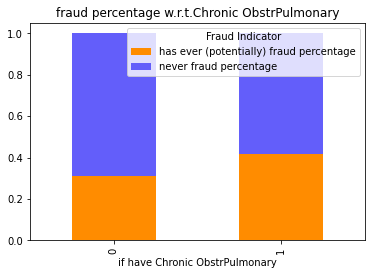

In [198]:
sub6 = benef[['Chronic_ObstrPulmonary', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_ObstrPulmonary',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub6 = sub6.pivot(index='Chronic_ObstrPulmonary', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub6['never fraud percentage']= sub6['never fraud']/(sub6['never fraud']+sub6['has ever (potentially) fraud'])
sub6['has ever (potentially) fraud percentage'
    ]= sub6['has ever (potentially) fraud']/(sub6['never fraud']+sub6['has ever (potentially) fraud'])
g6 = sub6[['Chronic_ObstrPulmonary', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t.Chronic ObstrPulmonary",
                 x= 'Chronic_ObstrPulmonary',stacked=True, color=['#FF8C00','#635EFA'])
g6.set(xlabel='if have Chronic ObstrPulmonary')
g6


In [199]:
# sub7 = sub_disease.groupby(['Chronic_Depression']).sum().reset_index()
# sub7
# sub7['non_fraud_perentage']= sub7['NumOfNonFraud']/(sub7['NumOfPotentialFraud']+sub7['NumOfNonFraud']+sub7['NumOfRealFraud'])
# sub7['potential_fraud_percentage']= sub7['NumOfPotentialFraud']/(sub7['NumOfPotentialFraud']+sub7['NumOfNonFraud']+sub7['NumOfRealFraud'])
# sub7['real_fraud_percentage']= sub7['NumOfRealFraud']/(sub7['NumOfPotentialFraud']+sub7['NumOfNonFraud']+sub7['NumOfRealFraud'])
# g7 = sub7[['Chronic_Depression', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Depression", 
#                                         x= 'Chronic_Depression',stacked=True)
# g7.set(xlabel='if have depression')

<AxesSubplot:title={'center':'fraud percentage w.r.t. Depression'}, xlabel='if have Depression'>

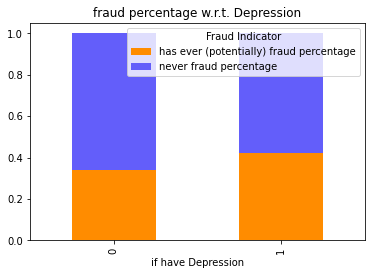

In [200]:
sub7 = benef[['Chronic_Depression', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_Depression',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub7 = sub7.pivot(index='Chronic_Depression', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub7['never fraud percentage']= sub7['never fraud']/(sub7['never fraud']+sub7['has ever (potentially) fraud'])
sub7['has ever (potentially) fraud percentage'
    ]= sub7['has ever (potentially) fraud']/(sub7['never fraud']+sub7['has ever (potentially) fraud'])
g7 = sub7[['Chronic_Depression', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. Depression",
                 x= 'Chronic_Depression',stacked=True, color=['#FF8C00','#635EFA'])
g7.set(xlabel='if have Depression')
g7


In [201]:
# sub8 = sub_disease.groupby(['Chronic_Diabetes']).sum().reset_index()
# sub8
# sub8['non_fraud_perentage']= sub8['NumOfNonFraud']/(sub8['NumOfPotentialFraud']+sub8['NumOfNonFraud']+sub8['NumOfRealFraud'])
# sub8['potential_fraud_percentage']= sub8['NumOfPotentialFraud']/(sub8['NumOfPotentialFraud']+sub8['NumOfNonFraud']+sub8['NumOfRealFraud'])
# sub8['real_fraud_percentage']= sub8['NumOfRealFraud']/(sub8['NumOfPotentialFraud']+sub8['NumOfNonFraud']+sub8['NumOfRealFraud'])
# g8 = sub8[['Chronic_Diabetes', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Chronic Diabetes", 
#                                         x= 'Chronic_Diabetes',stacked=True)
# g8.set(xlabel='if have Diabetes')

<AxesSubplot:title={'center':'fraud percentage w.r.t. Diabetes'}, xlabel='if have Diabetes'>

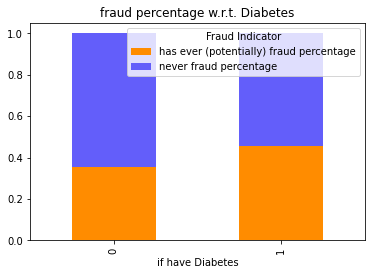

In [202]:
sub8 = benef[['Chronic_Diabetes', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_Diabetes',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub8 = sub8.pivot(index='Chronic_Diabetes', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub8['never fraud percentage']= sub8['never fraud']/(sub8['never fraud']+sub8['has ever (potentially) fraud'])
sub8['has ever (potentially) fraud percentage'
    ]= sub8['has ever (potentially) fraud']/(sub8['never fraud']+sub8['has ever (potentially) fraud'])
g8 = sub8[['Chronic_Diabetes', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. Diabetes",
                 x= 'Chronic_Diabetes',stacked=True, color=['#FF8C00','#635EFA'])
g8.set(xlabel='if have Diabetes')
g8



In [203]:
# sub9 = sub_disease.groupby(['Chronic_IschemicHeart']).sum().reset_index()
# sub9['non_fraud_perentage']= sub9['NumOfNonFraud']/(sub9['NumOfPotentialFraud']+sub9['NumOfNonFraud']+sub9['NumOfRealFraud'])
# sub9['potential_fraud_percentage']= sub9['NumOfPotentialFraud']/(sub9['NumOfPotentialFraud']+sub9['NumOfNonFraud']+sub9['NumOfRealFraud'])
# sub9['real_fraud_percentage']= sub9['NumOfRealFraud']/(sub9['NumOfPotentialFraud']+sub9['NumOfNonFraud']+sub9['NumOfRealFraud'])
# g9 = sub9[['Chronic_IschemicHeart', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Chronic Ischemic Heart disease", 
#                                         x= 'Chronic_IschemicHeart',stacked=True)
# g9.set(xlabel='if have Chronic Ischemic Heart disease')

<AxesSubplot:title={'center':'fraud percentage w.r.t. Chronic Ischemic Heart Disease'}, xlabel='if have Chronic Ischemic Heart Disease'>

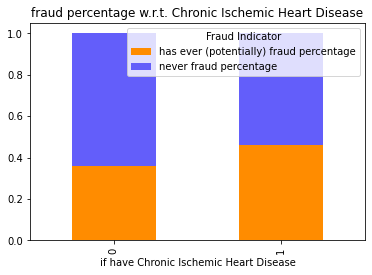

In [204]:
sub9 = benef[['Chronic_IschemicHeart', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_IschemicHeart',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub9 = sub9.pivot(index='Chronic_IschemicHeart', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub9['never fraud percentage']= sub9['never fraud']/(sub9['never fraud']+sub9['has ever (potentially) fraud'])
sub9['has ever (potentially) fraud percentage'
    ]= sub9['has ever (potentially) fraud']/(sub9['never fraud']+sub9['has ever (potentially) fraud'])
g9 = sub9[['Chronic_IschemicHeart', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. Chronic Ischemic Heart Disease",
                 x= 'Chronic_IschemicHeart',stacked=True, color=['#FF8C00','#635EFA'])
g9.set(xlabel='if have Chronic Ischemic Heart Disease')
g9


In [205]:
# sub10 = sub_disease.groupby(['Chronic_Osteoporasis']).sum().reset_index()
# sub10['non_fraud_perentage']= sub10['NumOfNonFraud']/(sub10['NumOfPotentialFraud']+sub10['NumOfNonFraud']+sub10['NumOfRealFraud'])
# sub10['potential_fraud_percentage']= sub10['NumOfPotentialFraud']/(sub10['NumOfPotentialFraud']+sub10['NumOfNonFraud']+sub10['NumOfRealFraud'])
# sub10['real_fraud_percentage']= sub10['NumOfRealFraud']/(sub10['NumOfPotentialFraud']+sub10['NumOfNonFraud']+sub10['NumOfRealFraud'])
# g10 = sub10[['Chronic_Osteoporasis', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Osteoporasis", 
#                                         x= 'Chronic_Osteoporasis',stacked=True)
# g10.set(xlabel='if have Osteoporasis')

<AxesSubplot:title={'center':'fraud percentage w.r.t. Chronic Ischemic Heart Disease'}, xlabel='if have Chronic Ischemic Heart Disease'>

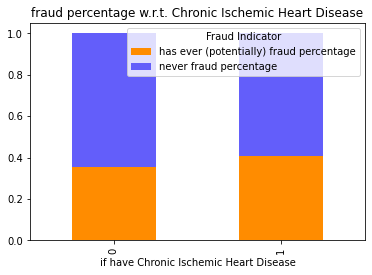

In [206]:
sub10 = benef[['Chronic_Osteoporasis', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_Osteoporasis',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub10 = sub10.pivot(index='Chronic_Osteoporasis', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub10['never fraud percentage']= sub10['never fraud']/(sub10['never fraud']+sub10['has ever (potentially) fraud'])
sub10['has ever (potentially) fraud percentage'
    ]= sub10['has ever (potentially) fraud']/(sub10['never fraud']+sub10['has ever (potentially) fraud'])
g10 = sub10[['Chronic_Osteoporasis', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. Chronic Ischemic Heart Disease",
                 x= 'Chronic_Osteoporasis',stacked=True, color=['#FF8C00','#635EFA'])
g10.set(xlabel='if have Chronic Ischemic Heart Disease')
g10



In [207]:
# sub11 = sub_disease.groupby(['Chronic_rheumatoidarthritis']).sum().reset_index()
# sub11['non_fraud_perentage']= sub11['NumOfNonFraud']/(sub11['NumOfPotentialFraud']+sub11['NumOfNonFraud']+sub11['NumOfRealFraud'])
# sub11['potential_fraud_percentage']= sub11['NumOfPotentialFraud']/(sub11['NumOfPotentialFraud']+sub11['NumOfNonFraud']+sub11['NumOfRealFraud'])
# sub11['real_fraud_percentage']= sub11['NumOfRealFraud']/(sub11['NumOfPotentialFraud']+sub11['NumOfNonFraud']+sub11['NumOfRealFraud'])
# g11 = sub11[['Chronic_rheumatoidarthritis', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. rheumatoid arthritis", 
#                                         x= 'Chronic_rheumatoidarthritis',stacked=True)
# g11.set(xlabel='if have rheumatoid arthritis')

<AxesSubplot:title={'center':'fraud percentage w.r.t. rheumatoid arthritis'}, xlabel='if have rheumatoid arthritis'>

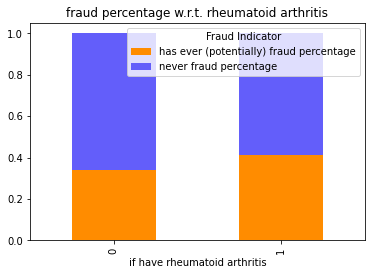

In [208]:
sub11 = benef[['Chronic_rheumatoidarthritis', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_rheumatoidarthritis',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub11 = sub11.pivot(index='Chronic_rheumatoidarthritis', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub11['never fraud percentage']= sub11['never fraud']/(sub11['never fraud']+sub11['has ever (potentially) fraud'])
sub11['has ever (potentially) fraud percentage'
    ]= sub11['has ever (potentially) fraud']/(sub11['never fraud']+sub11['has ever (potentially) fraud'])
g11 = sub11[['Chronic_rheumatoidarthritis', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. rheumatoid arthritis",
                 x= 'Chronic_rheumatoidarthritis',stacked=True, color=['#FF8C00','#635EFA'])
g11.set(xlabel='if have rheumatoid arthritis')
g11



In [209]:
# sub12 = sub_disease.groupby(['Chronic_stroke']).sum().reset_index()
# sub12['non_fraud_perentage']= sub12['NumOfNonFraud']/(sub12['NumOfPotentialFraud']+sub12['NumOfNonFraud']+sub12['NumOfRealFraud'])
# sub12['potential_fraud_percentage']= sub12['NumOfPotentialFraud']/(sub12['NumOfPotentialFraud']+sub12['NumOfNonFraud']+sub12['NumOfRealFraud'])
# sub12['real_fraud_percentage']= sub12['NumOfRealFraud']/(sub12['NumOfPotentialFraud']+sub12['NumOfNonFraud']+sub12['NumOfRealFraud'])
# g12 = sub12[['Chronic_stroke', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Chronic Ischemic Heart disease", 
#                                         x= 'Chronic_stroke',stacked=True)
# g12.set(xlabel='if have chronic stroke disease')

<AxesSubplot:title={'center':'fraud percentage w.r.t. chronic stroke disease'}, xlabel='if have chronic stroke disease'>

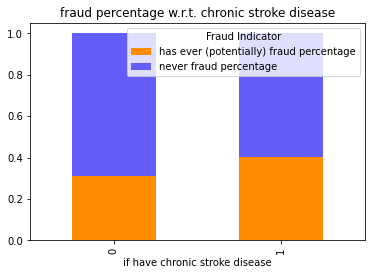

In [213]:
sub12 = benef[['Chronic_stroke', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['Chronic_stroke',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub12 = sub12.pivot(index='Chronic_stroke', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub12['never fraud percentage']= sub12['never fraud']/(sub12['never fraud']+sub12['has ever (potentially) fraud'])
sub12['has ever (potentially) fraud percentage'
    ]= sub12['has ever (potentially) fraud']/(sub12['never fraud']+sub12['has ever (potentially) fraud'])
g12 = sub12[['Chronic_stroke', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. chronic stroke disease",
                 x= 'Chronic_stroke',stacked=True, color=['#FF8C00','#635EFA'])
g12.set(xlabel='if have chronic stroke disease')
g12


In [214]:
# sub13 = sub_disease.groupby(['RenalDisease']).sum().reset_index()
# sub13['non_fraud_perentage']= sub13['NumOfNonFraud']/(sub13['NumOfPotentialFraud']+sub13['NumOfNonFraud']+sub13['NumOfRealFraud'])
# sub13['potential_fraud_percentage']= sub13['NumOfPotentialFraud']/(sub13['NumOfPotentialFraud']+sub13['NumOfNonFraud']+sub13['NumOfRealFraud'])
# sub13['real_fraud_percentage']= sub13['NumOfRealFraud']/(sub13['NumOfPotentialFraud']+sub13['NumOfNonFraud']+sub13['NumOfRealFraud'])
# g13 = sub13[['RenalDisease', 'non_fraud_perentage',
#       'potential_fraud_percentage','real_fraud_percentage']].plot(kind='bar', title="fraud percentage w.r.t. Renal Disease", 
#                                         x= 'RenalDisease',stacked=True)
# g13.set(xlabel='if have Renal Disease')

<AxesSubplot:title={'center':'fraud percentage w.r.t. Renal Disease'}, xlabel='if have RenalDisease'>

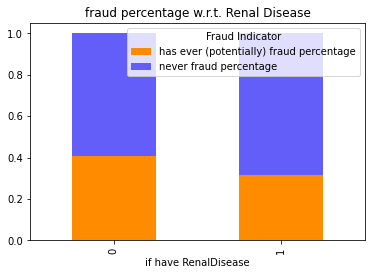

In [215]:
sub13 = benef[['RenalDisease', 'Fraud Indicator', 
              'NumOfNonFraud']].groupby(['RenalDisease',
                                         'Fraud Indicator']).count().reset_index().rename(columns={'NumOfNonFraud':'count'})
sub13 = sub13.pivot(index='RenalDisease', columns='Fraud Indicator',
           values='count').reset_index().rename(columns={0:'never fraud', 1:'has ever (potentially) fraud'})
sub13['never fraud percentage']= sub13['never fraud']/(sub13['never fraud']+sub13['has ever (potentially) fraud'])
sub13['has ever (potentially) fraud percentage'
    ]= sub13['has ever (potentially) fraud']/(sub13['never fraud']+sub13['has ever (potentially) fraud'])
g13 = sub13[['RenalDisease', 'has ever (potentially) fraud percentage', 'never fraud percentage'
     ]].plot(kind='bar', title="fraud percentage w.r.t. Renal Disease",
                 x= 'RenalDisease',stacked=True, color=['#FF8C00','#635EFA'])
g13.set(xlabel='if have RenalDisease')
g13

